# Final Project: COGS118A

### Second dataset: EEG EYE state Dataset

# 1. Setup

- Import necessary packages.
- Load dataset

In [5]:
# Installation
!pip install ucimlrepo

# General
import numpy as np
import os
import pandas as pd

# Data Formats
import gzip
import tarfile
import arff
from scipy.io import arff

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import normalize
from imblearn.over_sampling import SMOTE

# Data Split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# ML Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist


In [6]:
os.chdir('/Users/henrikformoe/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Github/final_project_COGS118A/')
print(os.getcwd())

/Users/henrikformoe/Desktop/Github/final_project_COGS118A


In [7]:
!pip install liac-arff # to deal with arff-files

In [8]:
# Load EEG-EYE state dataset

data = arff.loadarff('/Users/henrikformoe/Library/Mobile Documents/com~apple~CloudDocs/Desktop/Github/final_project_COGS118A/EEG Eye State.arff')

eeg = pd.DataFrame(data[0])

print(f"Shape: {eeg.shape}")
print(eeg.info())
print(eeg.head())

Shape: (14980, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  object 
dtypes: float64(14), object(1)
memory usage: 1.7+ MB
None
       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  432

In [9]:
print("Duplicates Check:")
print(f"EEG Eye State Dataset: {eeg.duplicated().sum()} duplicates")

Duplicates Check:
EEG Eye State Dataset: 0 duplicates


# 2. Exploratory Data Analysis and Preprocessing

- Summarize datasets. 
- Visualize features and check distributions. 

In [11]:
print(eeg.describe())

                 AF3            F7            F3            FC5            T7  \
count   14980.000000  14980.000000  14980.000000   14980.000000  14980.000000   
mean     4321.917777   4009.767694   4264.022433    4164.946326   4341.741075   
std      2492.072174     45.941672     44.428052    5216.404632     34.738821   
min      1030.770000   2830.770000   1040.000000    2453.330000   2089.740000   
25%      4280.510000   3990.770000   4250.260000    4108.210000   4331.790000   
50%      4294.360000   4005.640000   4262.560000    4120.510000   4338.970000   
75%      4311.790000   4023.080000   4270.770000    4132.310000   4347.180000   
max    309231.000000   7804.620000   6880.510000  642564.000000   6474.360000   

                  P7             O1            O2             P8  \
count   14980.000000   14980.000000  14980.000000   14980.000000   
mean     4644.022379    4110.400160   4616.056904    4218.826610   
std      2924.789537    4600.926543     29.292603    2136.408523  

In [12]:
# Convert 'eyeDetection' column to integer

eeg['eyeDetection'] = eeg['eyeDetection'].astype(int)

In [13]:
# Split data

X = eeg.drop(columns=['eyeDetection'])
y = eeg['eyeDetection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [14]:
# Scale data for RF and ANN

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Training features shape:", X_train_scaled.shape)
print("Validation features shape:", X_val_scaled.shape)
print("Testing features shape:", X_test_scaled.shape)

Training features shape: (8988, 14)
Validation features shape: (2996, 14)
Testing features shape: (2996, 14)


In [15]:
# Normalize for KNN

X_train_norm = normalize(X_train, axis=1)
X_val_norm = normalize(X_val, axis=1)
X_test_norm = normalize(X_test, axis=1)

print("Training features shape (normalized):", X_train_norm.shape)
print("Validation features shape (normalized):", X_val_norm.shape)
print("Testing features shape (normalized):", X_test_norm.shape)

Training features shape (normalized): (8988, 14)
Validation features shape (normalized): (2996, 14)
Testing features shape (normalized): (2996, 14)


## Visualize data

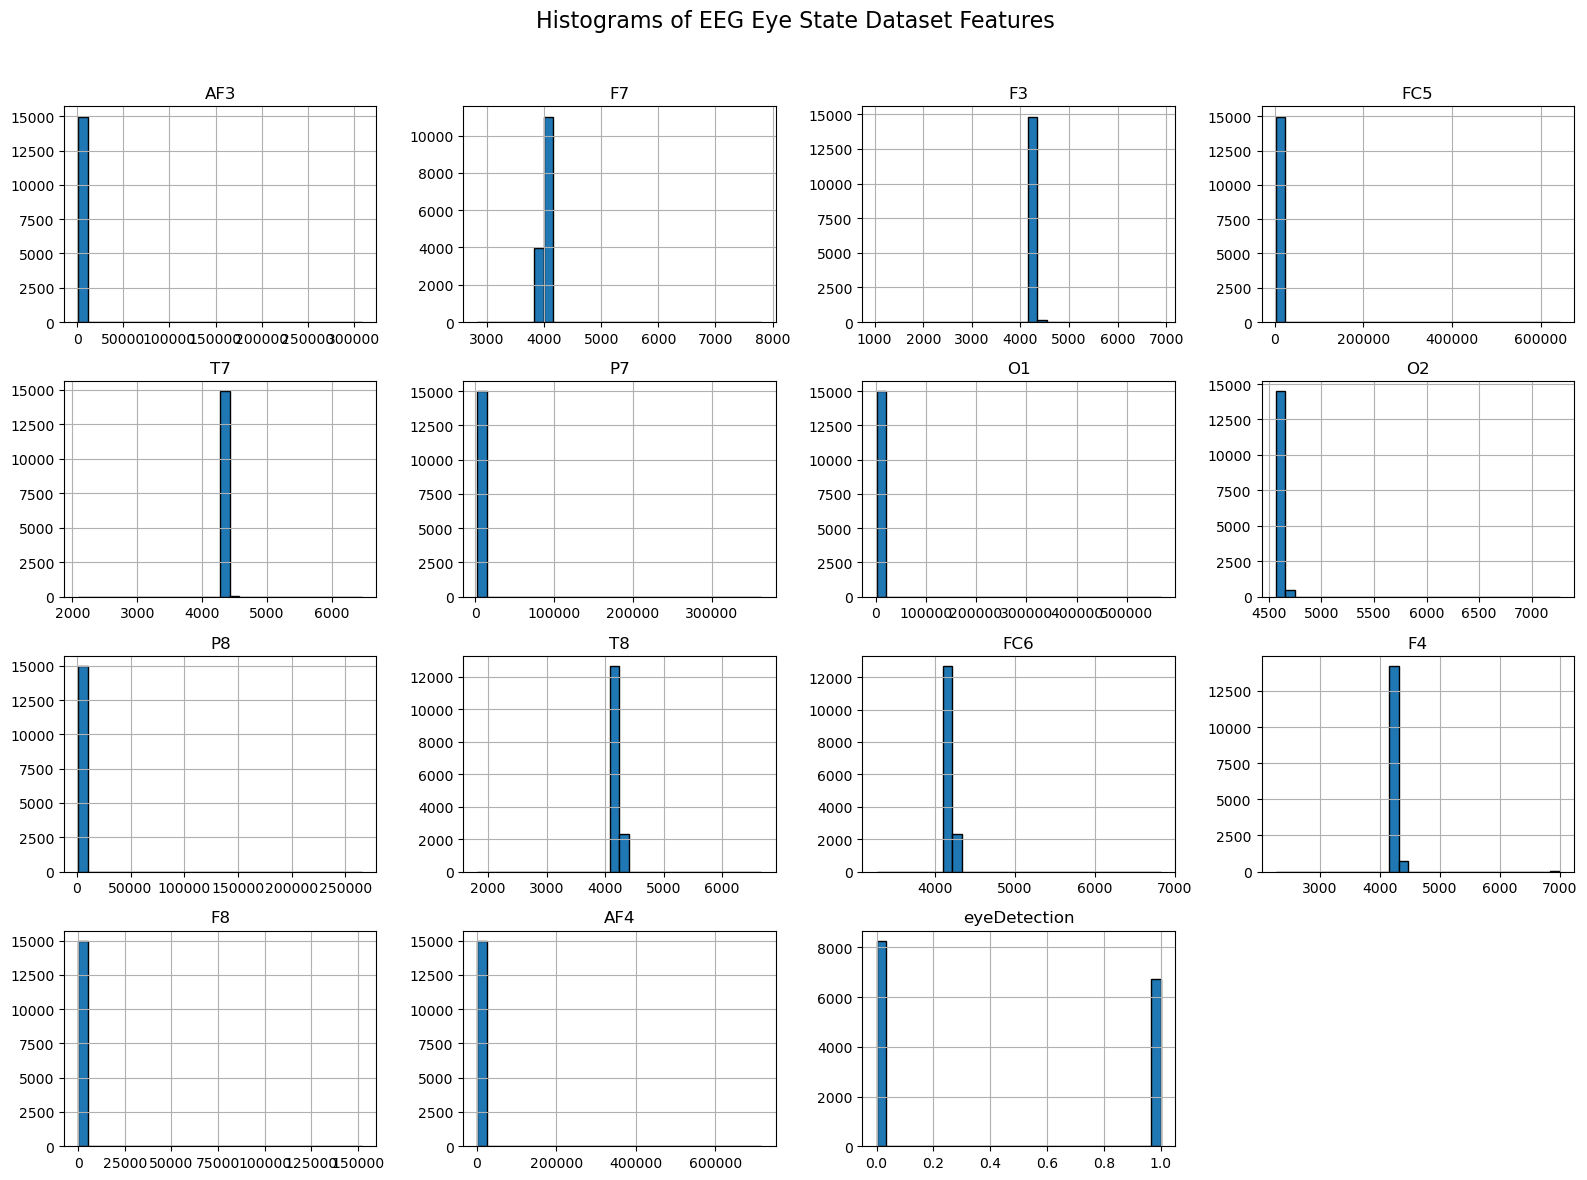

In [17]:
# Histograms for each feature

eeg.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of EEG Eye State Dataset Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [18]:
# Converting target to int

eeg['eyeDetection'] = eeg['eyeDetection'].astype(int)
numeric_eeg = eeg.select_dtypes(include=[np.number])
corr = numeric_eeg.corr()

In [19]:
# Select numeric columns

print(numeric_eeg.columns)
print([col for col in numeric_eeg.columns if 'eyeDetection' in col])

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'eyeDetection'],
      dtype='object')
['eyeDetection']


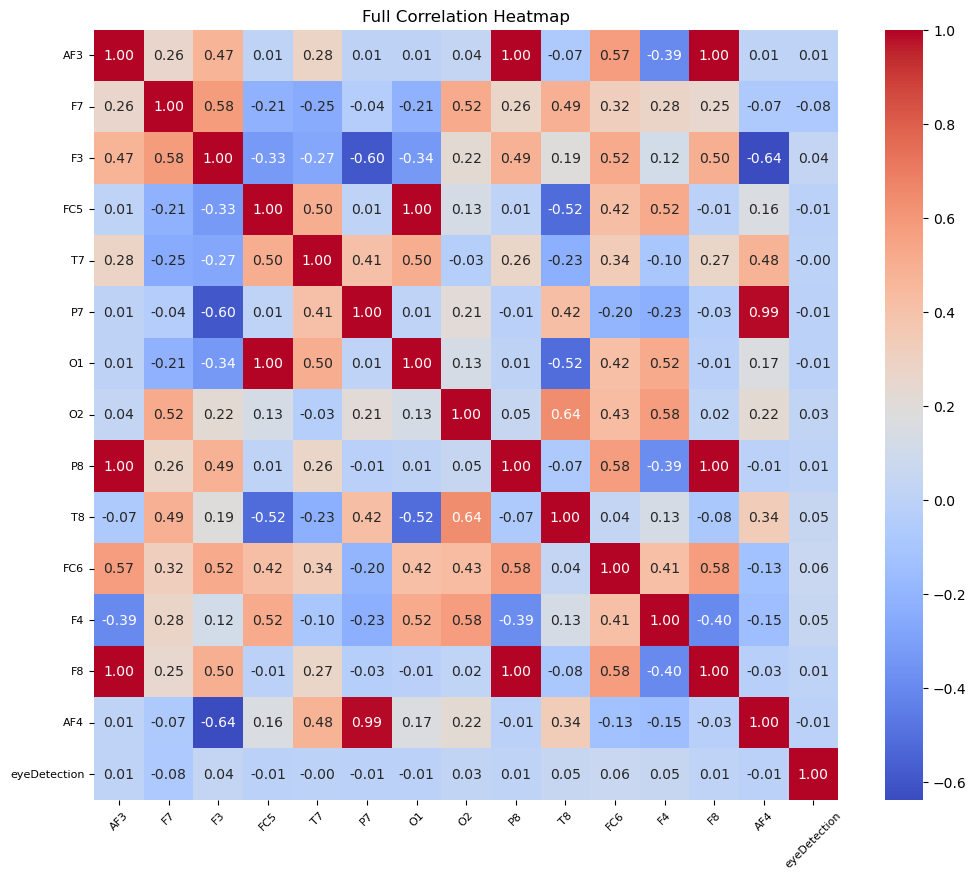

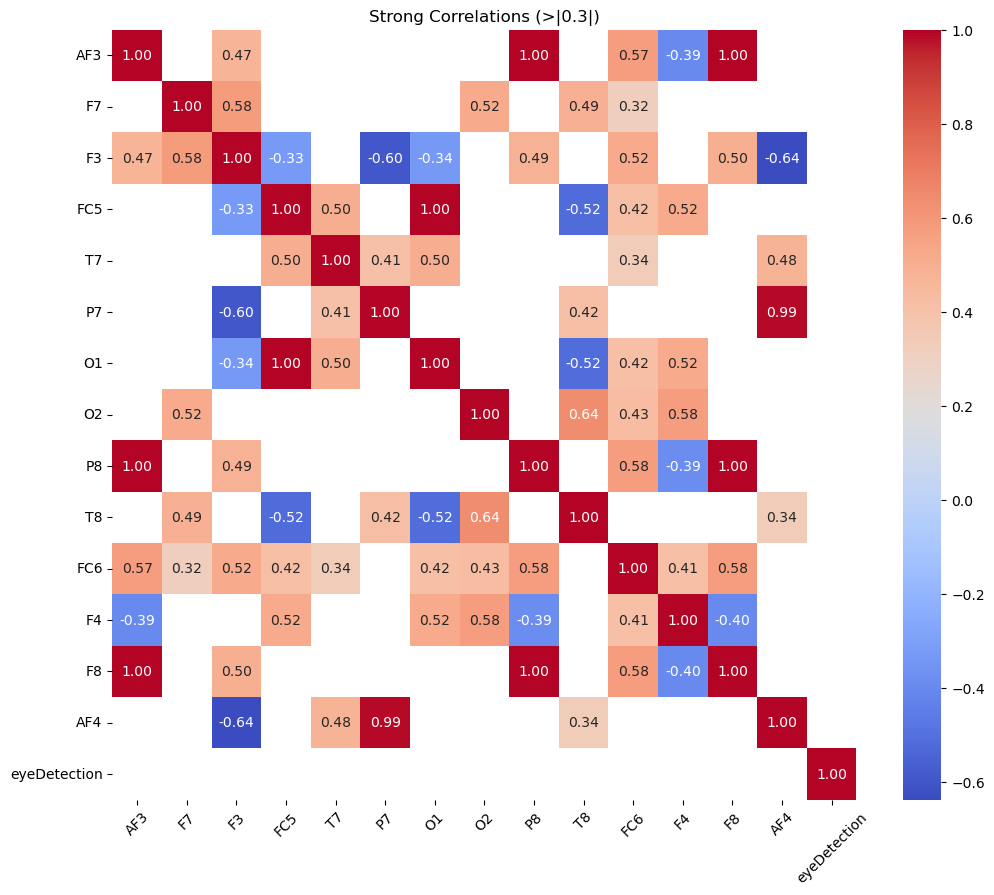

Correlations with target column (eyeDetection):
eyeDetection    1.000000
FC6             0.064294
F4              0.047965
T8              0.047218
F3              0.038902
O2              0.025100
F8              0.013120
AF3             0.010458
P8              0.009576
T7             -0.000369
O1             -0.007223
FC5            -0.007531
AF4            -0.007550
P7             -0.007845
F7             -0.079994
Name: eyeDetection, dtype: float64

Reduced dataset with selected features:
   eyeDetection
0             0
1             0
2             0
3             0
4             0


In [20]:
# Correlation Matrix for target and corr > 0.3

target_column = 'eyeDetection'

numeric_eeg = eeg.select_dtypes(include=[np.number])

# Correlation Heatmap (Full Correlation Matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_eeg.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Full Correlation Heatmap")
plt.show()

# Filter correlations with absolute value > 0.3
corr = numeric_eeg.corr()
threshold = 0.3
mask = abs(corr) < threshold

# Correlation Heatmap (Filtered for Significant Correlations)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, cbar=True)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Strong Correlations (>|0.3|)")
plt.show()

# Correlation with Target Column
target_corr = corr[target_column].sort_values(ascending=False)
print("Correlations with target column (eyeDetection):")
print(target_corr)

# Select features with correlations > 0.3
selected_features = target_corr[abs(target_corr) > threshold].index
reduced_data = eeg[selected_features]

print("\nReduced dataset with selected features:")
print(reduced_data.head())

In [21]:
# Correlation between eyeDetection and features

target_corr = numeric_eeg.corr()['eyeDetection'].sort_values(ascending=False)
print(target_corr)

eyeDetection    1.000000
FC6             0.064294
F4              0.047965
T8              0.047218
F3              0.038902
O2              0.025100
F8              0.013120
AF3             0.010458
P8              0.009576
T7             -0.000369
O1             -0.007223
FC5            -0.007531
AF4            -0.007550
P7             -0.007845
F7             -0.079994
Name: eyeDetection, dtype: float64


In [22]:
# Select features with strong correlation

selected_features = target_corr[abs(target_corr) > 0.3].index
reduced_data = eeg[selected_features]
print(reduced_data.head())

   eyeDetection
0             0
1             0
2             0
3             0
4             0


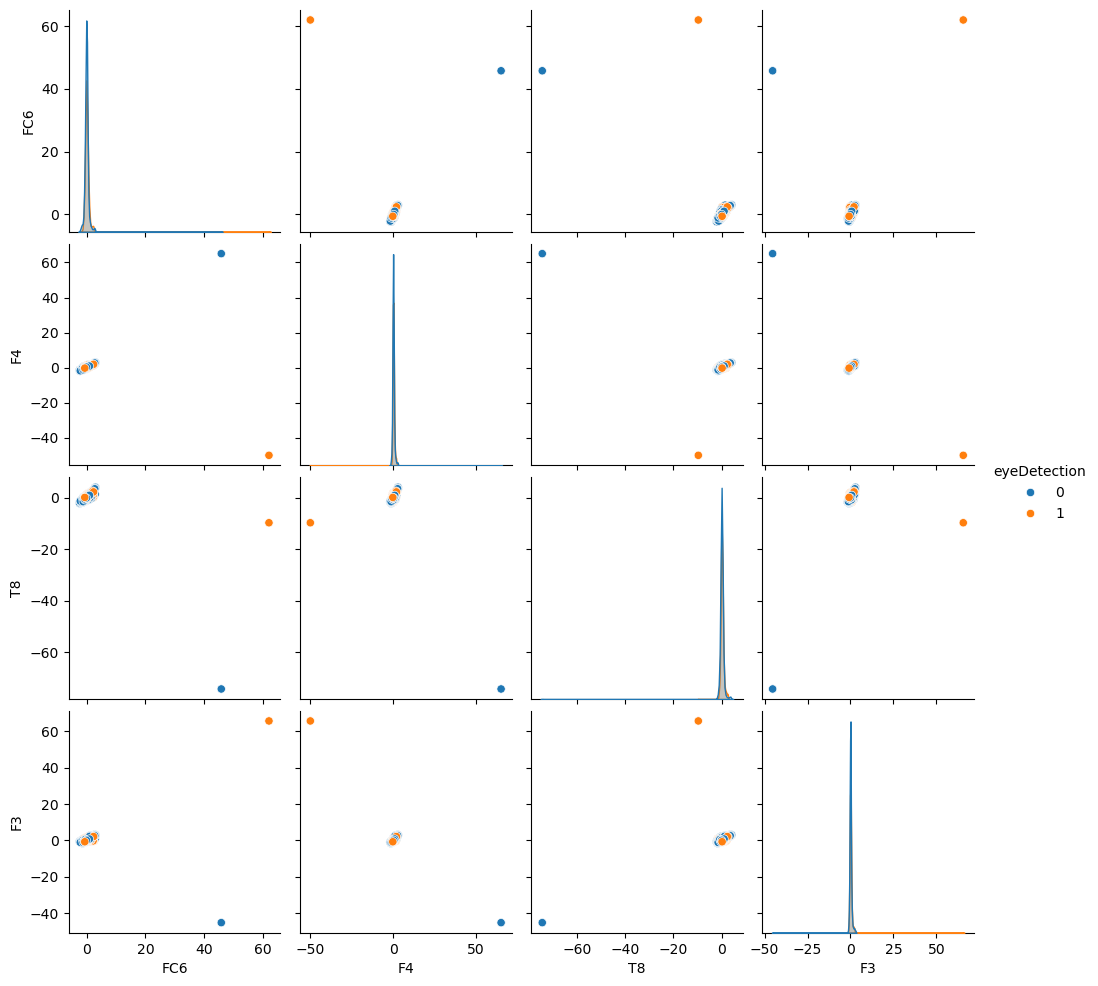

In [23]:
scaled_eeg = pd.DataFrame(X_train_scaled, columns=X.columns)
scaled_eeg['eyeDetection'] = y_train.reset_index(drop=True)

# Pairplot for scaled data
sns.pairplot(scaled_eeg, vars=['FC6', 'F4', 'T8', 'F3'], hue='eyeDetection', diag_kind="kde")
plt.show()

# 3. Preprocessing

In [25]:
# Check for null values

print(eeg.isnull().sum())

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64


In [26]:
# Normalize numeric columns

numeric_columns = eeg.select_dtypes(include=[np.number]).columns

scaler = MinMaxScaler()

eeg_normalized = eeg.copy()
eeg_normalized[numeric_columns] = scaler.fit_transform(eeg[numeric_columns])

print(eeg_normalized.head())

        AF3        F7        F3       FC5        T7        P7        O1  \
0  0.010702  0.236931  0.556326  0.002648  0.515557  0.005053  0.003558   
1  0.010687  0.236004  0.557117  0.002649  0.513684  0.005054  0.003559   
2  0.010697  0.236416  0.557379  0.002661  0.512514  0.005046  0.003558   
3  0.010701  0.237446  0.557556  0.002660  0.514035  0.005043  0.003559   
4  0.010692  0.237446  0.556854  0.002653  0.514971  0.005054  0.003556   

         O2        P8        T8       FC6        F4        F8       AF4  \
0  0.027383  0.010837  0.498575  0.264230  0.426286  0.029886  0.004237   
1  0.026619  0.010795  0.496148  0.263219  0.426071  0.029865  0.004224   
2  0.023390  0.010783  0.495197  0.262931  0.426610  0.029838  0.004231   
3  0.023579  0.010820  0.497940  0.264086  0.427799  0.029862  0.004241   
4  0.022437  0.010795  0.499735  0.264664  0.427909  0.029865  0.004244   

   eyeDetection  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4       

In [27]:
# Separate features and target variable, and split into training, validation and test sets

X = eeg_normalized.drop(columns=['eyeDetection'])
y = eeg_normalized['eyeDetection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Training features shape:", X_train.shape)
print("Validation features shape:", X_val.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_val.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (8988, 14)
Validation features shape: (2996, 14)
Testing features shape: (2996, 14)
Training target shape: (8988,)
Validation target shape: (2996,)
Testing target shape: (2996,)


# 4. Train and tune Models

- Train Random Forests, KNN, and Neural Networks
- Compare performances

## Random Forest Classifier

In [30]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_val_rf = rf.predict(X_val_scaled)
print("Random Forest Classifier Performance on Validation Data:")
print(classification_report(y_val, y_pred_val_rf))

Random Forest Classifier Performance on Validation Data:
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93      1676
         1.0       0.93      0.89      0.91      1320

    accuracy                           0.92      2996
   macro avg       0.92      0.92      0.92      2996
weighted avg       0.92      0.92      0.92      2996



# GridSearchCV for hyperparameter tuning for RF

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

## K-Nearest Neighbors Classifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_norm, y_train)

y_pred_val_knn = knn.predict(X_val_norm)

print("K-Nearest Neighbors Classifier Performance on Validation Data:")
print(classification_report(y_val, y_pred_val_knn))

K-Nearest Neighbors Classifier Performance on Validation Data:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      1676
         1.0       0.96      0.95      0.96      1320

    accuracy                           0.96      2996
   macro avg       0.96      0.96      0.96      2996
weighted avg       0.96      0.96      0.96      2996



# GridSearchCV for hyperparameter tuning for KNN 

param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_norm, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
y_pred = grid_search.best_estimator_.predict(X_test_norm)
print(classification_report(y_test, y_pred))

## Neural Network Classifier

In [36]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=2000, random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred_val_mlp = mlp.predict(X_val_scaled)

print("Neural Network Classifier Performance on Validation Data:")
print(classification_report(y_val, y_pred_val_mlp))

Neural Network Classifier Performance on Validation Data:
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      1676
         1.0       0.85      0.86      0.86      1320

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.87      0.87      0.87      2996



# GridSearchCV for hyperparameter tuning for ANN

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'max_iter': [1500, 2000],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
}

mlp = MLPClassifier(random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

y_pred_val_mlp = grid_search.best_estimator_.predict(X_val_scaled)
print("Neural Network Classifier Performance on Validation Data:")
print(classification_report(y_val, y_pred_val_mlp))

## Comparison of models

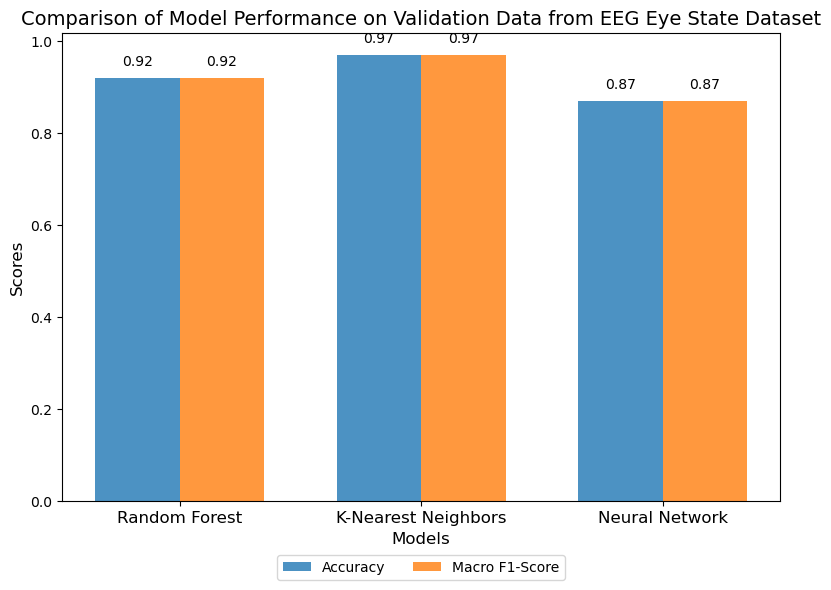

In [71]:
# Metrics for each model deployed on validation data from EEG Eye State Dataset

models = ['Random Forest', 'K-Nearest Neighbors', 'Neural Network']
accuracies = [0.92, 0.97, 0.87]
macro_f1_scores = [0.92, 0.97, 0.87]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8)
bars2 = ax.bar(x + width/2, macro_f1_scores, width, label='Macro F1-Score', alpha=0.8)

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Model Performance on Validation Data from EEG Eye State Dataset', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 5. Evaluation

## Random Forest Classifier

In [51]:
print("Random Forest Classifier Performance on Validation Data:")
print(classification_report(y_val, y_pred_val_rf))

y_pred_test_rf = rf.predict(X_test_scaled)
print("Random Forest Classifier Performance on Test Data:")
print(classification_report(y_test, y_pred_test_rf))

Random Forest Classifier Performance on Validation Data:
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93      1676
         1.0       0.93      0.89      0.91      1320

    accuracy                           0.92      2996
   macro avg       0.92      0.92      0.92      2996
weighted avg       0.92      0.92      0.92      2996

Random Forest Classifier Performance on Test Data:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      1586
         1.0       0.94      0.88      0.91      1410

    accuracy                           0.92      2996
   macro avg       0.92      0.92      0.92      2996
weighted avg       0.92      0.92      0.92      2996



   Feature  Importance
6       O1    0.118945
5       P7    0.107317
1       F7    0.088305
12      F8    0.082765
13     AF4    0.078600
0      AF3    0.076444
11      F4    0.061684
3      FC5    0.060652
10     FC6    0.060306
4       T7    0.056551
9       T8    0.055251
7       O2    0.054536
2       F3    0.053717
8       P8    0.044927


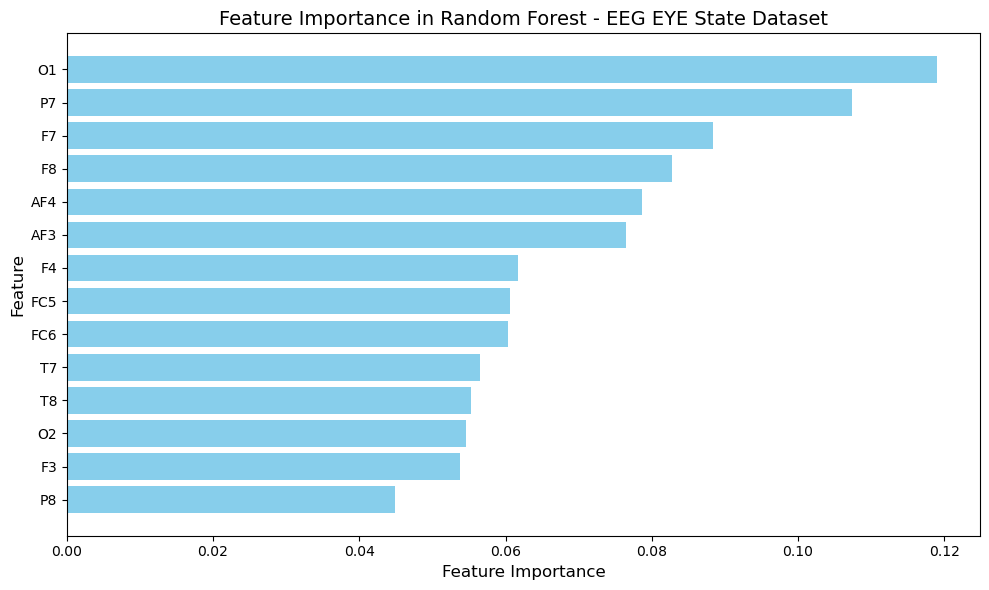

In [73]:
# Feature importance from trained Random Forest model

feature_importances = rf.feature_importances_

features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(features)

plt.figure(figsize=(10, 6))
plt.barh(features['Feature'], features['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance in Random Forest - EEG EYE State Dataset', fontsize=14)
plt.tight_layout()
plt.show()

## K-Nearest Neighbors Classifier

In [60]:
print("K-Nearest Neighbors Classifier Performance on Validation Data:")
print(classification_report(y_val, y_pred_val_knn))

y_pred_test_knn = knn.predict(X_test_norm)
print("K-Nearest Neighbors Classifier Performance on Test Data:")
print(classification_report(y_test, y_pred_test_knn))

K-Nearest Neighbors Classifier Performance on Validation Data:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      1676
         1.0       0.96      0.95      0.96      1320

    accuracy                           0.96      2996
   macro avg       0.96      0.96      0.96      2996
weighted avg       0.96      0.96      0.96      2996

K-Nearest Neighbors Classifier Performance on Test Data:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1586
         1.0       0.97      0.96      0.96      1410

    accuracy                           0.97      2996
   macro avg       0.97      0.97      0.97      2996
weighted avg       0.97      0.97      0.97      2996



## Neural Network Classifier

In [62]:
print("Neural Network Classifier Performance on Validation Data:")
print(classification_report(y_val, y_pred_val_mlp))

y_pred_test_mlp = mlp.predict(X_test_scaled)
print("Neural Network Classifier Performance on Test Data:")
print(classification_report(y_test, y_pred_test_mlp))

Neural Network Classifier Performance on Validation Data:
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      1676
         1.0       0.85      0.86      0.86      1320

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.87      0.87      0.87      2996

Neural Network Classifier Performance on Test Data:
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      1586
         1.0       0.88      0.86      0.87      1410

    accuracy                           0.88      2996
   macro avg       0.88      0.88      0.88      2996
weighted avg       0.88      0.88      0.88      2996



## Comparison of final models on test data:

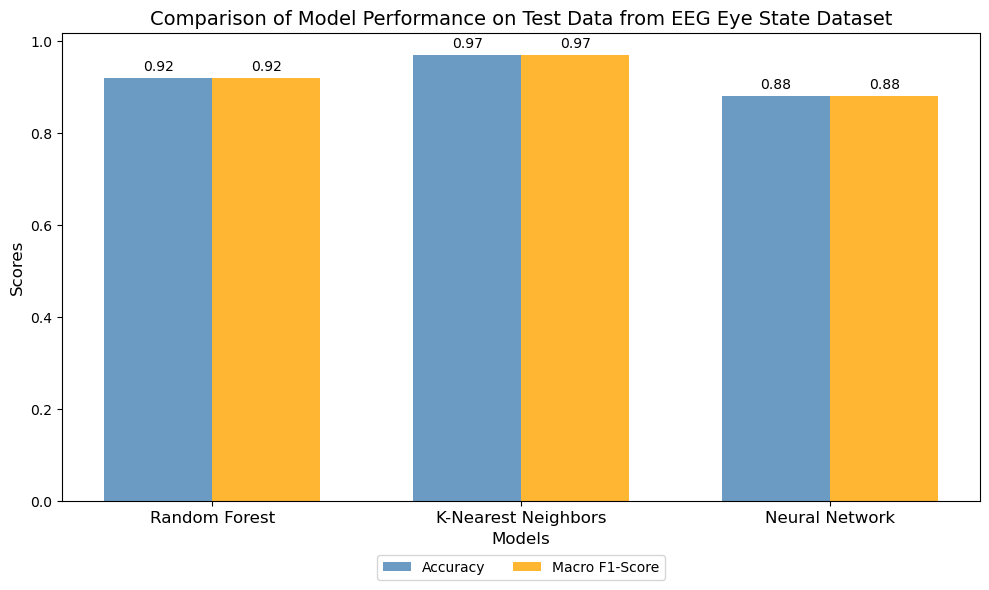

In [69]:
odels = ['Random Forest', 'K-Nearest Neighbors', 'Neural Network']
accuracies = [0.92, 0.97, 0.88]
macro_f1_scores = [0.92, 0.97, 0.88]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8, color='steelblue')
bars2 = ax.bar(x + width/2, macro_f1_scores, width, label='Macro F1-Score', alpha=0.8, color='orange')

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Model Performance on Test Data from EEG Eye State Dataset', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()